In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from GetAprilTrainTestData import GetAprilTrainTestData
from sklearn.ensemble import RandomForestRegressor
import time
import datetime

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
ssr_df = GetAprilTrainTestData()

In [5]:
X_raw = ssr_df.iloc[:, ~ssr_df.columns.isin(["MSYE", "MSYE_RULE"])]
y = ssr_df["MSYE"].values.reshape(-1, 1)

print(len(X), len(y))

13413 13413


In [6]:
X_raw.columns

Index(['SETUP_END_DATE', 'TESTERTYPE', 'TESTER', 'SETUP_TIME', 'CYCLES',
       'TESTED_UNITS', 'RESCREEN_RULE', 'MSE_RULE', 'SPC_RULE', 'INDEX_RULE',
       'MCBJ_RULE', 'SETUPTIME_RULE', 'MSE_UNIT', 'JAM_COUNT', 'MCBJ',
       'PRODUCT', 'PROGRAM', 'TEMP', 'HANDLR_TYPE', 'HANDLR_ID', 'PKG_CHANGE',
       'LBID_CHANGE', 'PRODUCT_CHANGE', 'PROGRAM_CHANGE', 'TEMP_CHANGE',
       'HANDLER_CHANGE', 'HANDLERCLASS', 'HANDLER_SW_REV', 'TEST_AREA',
       'OEE_PERCENT', 'PGM_SITES', 'SAP_MATERIAL', 'SMSDEVICE',
       'HANDLER_DIAGNOSTICS_COUNT', 'NICHE', 'SBE', 'SBE_1', 'SBE_2',
       'TESTERHEAD', 'LOT_RUN_TIME_HOURS', 'LOTRUNTIME_RULE', 'DIB_DIAG_COUNT',
       'LOTSCREENTYPE', 'UTIME'],
      dtype='object')

In [7]:
X_raw.head(20)

,SETUP_END_DATE,TESTERTYPE,TESTER,SETUP_TIME,CYCLES,TESTED_UNITS,RESCREEN_RULE,MSE_RULE,SPC_RULE,INDEX_RULE,...,NICHE,SBE,SBE_1,SBE_2,TESTERHEAD,LOT_RUN_TIME_HOURS,LOTRUNTIME_RULE,DIB_DIAG_COUNT,LOTSCREENTYPE,UTIME
1733,2019-04-01 11:08:49.0,93K,93k1,10.1,17,208,1,1,1,1,...,KEPLER 3.1,EPD,PROCESSORS,RA PROCESSORS,93k1_1,1.94,1,0,FIRST_PASS,1.554135e+09
1734,2019-04-01 13:44:53.0,93K,93k1,39.6,75,909,1,1,1,1,...,KEPLER 3.1,EPD,PROCESSORS,RA PROCESSORS,93k1_1,4.42,1,1,FIRST_PASS,1.554144e+09
2314,2019-04-01 18:32:53.0,93K,93k1,7.7,57,682,1,1,1,1,...,KEPLER 3.1,EPD,PROCESSORS,RA PROCESSORS,93k1_1,3.21,1,1,FIRST_PASS,1.554162e+09
2315,2019-04-01 21:50:25.0,93K,93k1,4.7,55,669,1,1,1,1,...,KEPLER 3.1,EPD,PROCESSORS,RA PROCESSORS,93k1_1,4.20,1,1,FIRST_PASS,1.554173e+09
2317,2019-04-02 02:30:40.0,93K,93k1,6.9,54,663,1,1,1,0,...,KEPLER 3.1,EPD,PROCESSORS,RA PROCESSORS,93k1_1,3.53,1,0,FIRST_PASS,1.554190e+09
2524,2019-04-02 06:08:28.0,93K,93k1,6.0,26,315,1,1,1,1,...,KEPLER 3.1,EPD,PROCESSORS,RA PROCESSORS,93k1_1,1.78,1,0,FIRST_PASS,1.554203e+09
2523,2019-04-02 08:01:20.0,93K,93k1,6.0,20,234,1,1,1,1,...,KEPLER 3.1,EPD,PROCESSORS,RA PROCESSORS,93k1_1,1.25,1,0,FIRST_PASS,1.554210e+09
2760,2019-04-02 09:20:41.0,93K,93k1,4.4,29,350,1,1,1,1,...,KEPLER 3.1,EPD,PROCESSORS,RA PROCESSORS,93k1_1,2.11,1,0,FIRST_PASS,1.554215e+09
2814,2019-04-02 12:04:58.0,93K,93k1,7.0,54,646,1,1,1,1,...,KEPLER 3.1,EPD,PROCESSORS,RA PROCESSORS,93k1_1,3.30,1,1,FIRST_PASS,1.554225e+09
2787,2019-04-02 15:29:13.0,93K,93k1,6.0,57,684,1,1,1,1,...,KEPLER 3.1,EPD,PROCESSORS,RA PROCESSORS,93k1_1,3.25,1,0,FIRST_PASS,1.554237e+09


In [113]:
# Shift all the MSYE results, which are stored in y, backwards by 1%. When we train this way, we are basically
# trying to train the model to predict the future 1% of readings into the future. This is an interesting idea.
forecast_out = int( 0.01* len(X))
print(forecast_out)
y = np.roll(y, -forecast_out)
y[-forecast_out:, 0] = None

132


In [114]:
# Now need to one hot encode all the stuff in X that is categorical. 
X = pd.get_dummies(X_raw)
print("Shape", X.shape)

Shape (13413, 3947)


In [115]:
# Select the last 1% of data to drive the forecast
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = y[:-forecast_out]
len(X_lately), len(X), len(y)


(132, 13281, 13281)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
print(len(X_train), len(y_train), len(X_test), len(y_test))

9960 9960 3321 3321


In [117]:
regr = RandomForestRegressor(random_state=0, n_estimators=400, n_jobs=-1, min_samples_leaf = 5)
regr.fit(X_train, np.concatenate(y_train, axis=0))


KeyboardInterrupt: 

In [98]:
score = regr.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: -0.03734763664152796


In [99]:
len(regr.feature_importances_)

3947

In [110]:
predictions = regr.predict(X_test)
plt.scatter(predictions, predictions - np.concatenate(y_test, axis=0))
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 3947 and input n_features is 3949 

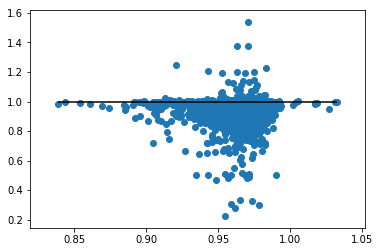

In [106]:
plt.scatter(predictions, np.concatenate(y_test, axis=0))
plt.hlines(y=1, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [107]:
out_df=pd.DataFrame(X_test)
out_df.columns=X.columns
out_df["MSYE"] = list(np.concatenate(y_test, axis=0))
out_df["Predictions"] = predictions
out_df.head()

,SETUP_TIME,CYCLES,TESTED_UNITS,RESCREEN_RULE,MSE_RULE,SPC_RULE,INDEX_RULE,MCBJ_RULE,SETUPTIME_RULE,MSE_UNIT,...,TESTERHEAD_vl80_1,TESTERHEAD_vl81_1,TESTERHEAD_vl91_1,TESTERHEAD_vl93_1,TESTERHEAD_vl95_1,TESTERHEAD_vl98_1,TESTERHEAD_vl99_1,TESTERHEAD_vl9_1,MSYE,Predictions
40158,19.4,970,2160,1,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0.961,0.905628
15153,5.5,4,1440,1,1,1,1,1,1,0.997,...,0,0,0,0,0,0,0,0,0.989,0.946369
6429,5.3,320,2880,1,1,1,1,1,1,0.998,...,0,0,0,0,0,0,0,0,0.990,0.973122
31060,1.7,796,3840,0,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0.950,0.966029
30133,130.3,1388,2995,1,1,1,1,1,0,0.999,...,0,0,0,0,0,0,0,0,0.904,0.964044


In [108]:
out_df.to_csv("data/product_test_data_RandomForest_Study.csv")

In [13]:
len(X_raw)

13413

In [15]:
X_lately.head()

,SETUP_TIME,CYCLES,TESTED_UNITS,RESCREEN_RULE,MSE_RULE,SPC_RULE,INDEX_RULE,MCBJ_RULE,SETUPTIME_RULE,MSE_UNIT,...,TESTERHEAD_vl76_1,TESTERHEAD_vl76_2,TESTERHEAD_vl80_1,TESTERHEAD_vl81_1,TESTERHEAD_vl91_1,TESTERHEAD_vl93_1,TESTERHEAD_vl95_1,TESTERHEAD_vl98_1,TESTERHEAD_vl99_1,TESTERHEAD_vl9_1
41862,25.2,862,3815,1,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0,0
41863,18.4,456,620,0,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0,0
41866,19.0,0,965,1,1,1,1,1,1,0.993,...,0,0,0,0,0,0,0,0,0,0
41867,15.5,168,693,1,1,1,1,1,1,0.991,...,0,0,0,0,0,0,0,0,0,0
41868,26.2,878,3923,1,1,1,1,1,1,0.998,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = X[:-forecast_out]


In [17]:
X.head()

,SETUP_TIME,CYCLES,TESTED_UNITS,RESCREEN_RULE,MSE_RULE,SPC_RULE,INDEX_RULE,MCBJ_RULE,SETUPTIME_RULE,MSE_UNIT,...,TESTERHEAD_vl76_1,TESTERHEAD_vl76_2,TESTERHEAD_vl80_1,TESTERHEAD_vl81_1,TESTERHEAD_vl91_1,TESTERHEAD_vl93_1,TESTERHEAD_vl95_1,TESTERHEAD_vl98_1,TESTERHEAD_vl99_1,TESTERHEAD_vl9_1
0,10.7,423,1888,1,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0,0
1,6.7,362,1647,1,1,1,1,1,1,0.997,...,0,0,0,0,0,0,0,0,0,0
5,4.6,961,1159,1,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0,0
8,32.5,638,5760,1,1,1,1,1,1,0.998,...,0,0,0,0,0,0,0,0,0,0
9,4.6,318,2880,1,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0,0


In [31]:
forecast_set = regr.predict(X_lately)

In [32]:
out_df['Forecast']=np.nan


In [34]:
next_record = len(out_df)
for i in forecast_set:
    next_record += 1
    print(next_record)

3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
